In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 22s 0us/step


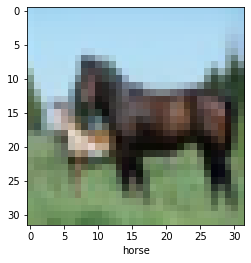

In [6]:
# Visualizing images
IMG_INDEX = 12  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [18]:
model.summary()

# Below shows the conv net + the dense layers classifier working together to form the entire chain

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [19]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 49s 974us/sample - loss: 1.5329 - accuracy: 0.4398 - val_loss: 1.2507 - val_accuracy: 0.5553
Epoch 2/10
50000/50000 [==============================] - 46s 916us/sample - loss: 1.1586 - accuracy: 0.5861 - val_loss: 1.0964 - val_accuracy: 0.6138
Epoch 3/10
50000/50000 [==============================] - 46s 915us/sample - loss: 1.0060 - accuracy: 0.6447 - val_loss: 0.9966 - val_accuracy: 0.6483
Epoch 4/10
50000/50000 [==============================] - 47s 934us/sample - loss: 0.9145 - accuracy: 0.6803 - val_loss: 0.9261 - val_accuracy: 0.6779
Epoch 5/10
50000/50000 [==============================] - 48s 956us/sample - loss: 0.8465 - accuracy: 0.7033 - val_loss: 0.8853 - val_accuracy: 0.6933
Epoch 6/10
50000/50000 [==============================] - 49s 983us/sample - loss: 0.7875 - accuracy: 0.7244 - val_loss: 0.8895 - val_accuracy: 0.6949
Epoch 7/10
50000/50000 [====================

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

10000/10000 - 2s - loss: 0.9301 - accuracy: 0.6897
0.6897


# Data Augmentation
To using existing images, process more, in order to feed in more data to train with

In [21]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

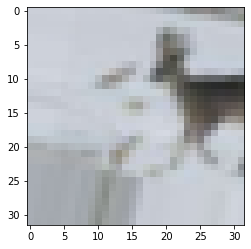

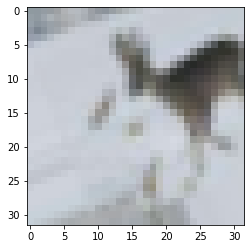

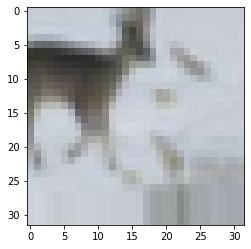

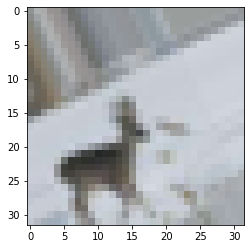

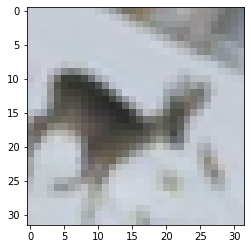

In [24]:
# generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_img = train_images[20]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break
        
plt.show()


# Using a pre-trained model for earlier stage of training

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [28]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

W0725 15:01:46.510234 4639641024 cats_vs_dogs.py:107] 1738 images were corrupted and were skipped


Shuffling and writing examples to /Users/BharathSrinivas/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRKYMXK/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /Users/BharathSrinivas/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


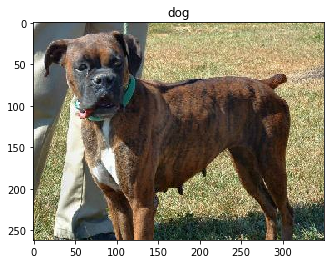

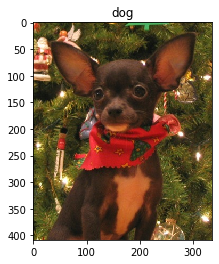

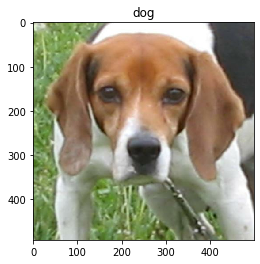

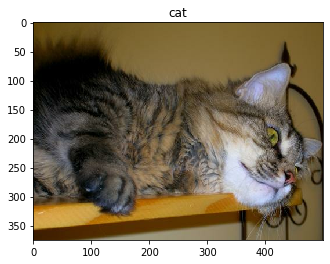

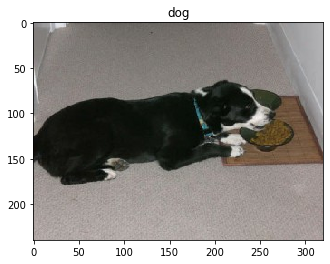

In [32]:
get_label_name = metadata.features['label'].int2str

# display images from new dataset
for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))


In [33]:
# scale images to same size
IMG_SIZE = 160

def format_images(image, label):
    """
    to return images rehaped to IMG_SIZE
    """
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label
    

In [34]:
# applying formatting function to all images 
train = raw_train.map(format_images)
validation = raw_validation.map(format_images)
test = raw_test.map(format_images)

W0725 15:07:17.704326 4639641024 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0725 15:07:17.733114 4639641024 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


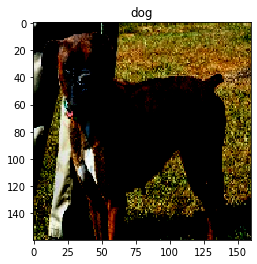

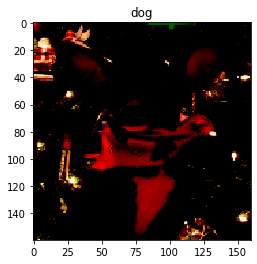

In [35]:
# Visualizing

for image, label in train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [52]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [53]:
# CHecking shapes of images
for img, label in raw_train.take(2):
    print("Og shape: ", img.shape)
for img, label in train.take(2):
    print("New shape: ", img.shape)

Og shape:  (262, 350, 3)
Og shape:  (409, 336, 3)
New shape:  (160, 160, 3)
New shape:  (160, 160, 3)


In [54]:
# Picking pretrained model — mobilenet V2

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

#include_top refers to whether we want the classifier that comes with this pretrained model
# load weights from 'imagenet'

In [55]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [56]:
# base_model outputs a shape (32, 5, 5, 1280). 32 = 32 diff filters/features

In [57]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [58]:
# Use above as the base to our network - without re-training the pre trained model

In [59]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [60]:
# Adding our own classifier to above pre trained model

# putting output of above model into a 1d layer flattened
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [61]:
pred_layer = keras.layers.Dense(1)

In [62]:
# combining layers into a model
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    pred_layer
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
# training

base_learing_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learing_rate),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [64]:
# Evaluate model without the additional layers added
inital_epochs = 3
validation_steps = 20

loss_, accuracy_ = model.evaluate(validation_batches, steps = validation_steps)


20/20 [==============================] - 11s 536ms/step - loss: 0.8835 - accuracy: 0.3953


In [ ]:
# train it on our images

history = model.fit(train_batches,
                   epochs=inital_epochs,
                   validation_data=validation_batches)
acc = history.history['accuracy']
print(acc)

Epoch 1/3
    116/Unknown - 105s 902ms/step - loss: 0.6382 - accuracy: 0.6056